# CNN for Image Classification

In this lab, you are given a dataset containing 6,000 pictures of cats and dogs (3,000 cats, 3,000 dogs) and asked to train a classifier built upon Convolutional Neural Networks (ConvNets) to classify images as "dogs" or "cats".

In [19]:
%matplotlib inline

import os
#this code can aviod kernel error during plt
#https://github.com/dmlc/xgboost/issues/1715
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import numpy as np
import matplotlib.pyplot as plt
import cv2

import keras
from keras import metrics
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D

### Exercise 1 
Split the dataset by selecting 4,800 pictures for training, 600 for validation, and 600 for testing.

In [20]:
img_width = 50
img_height = 50
num_classes = 2
DATA_DIR = 'data/'
image_filenames = [DATA_DIR+i for i in os.listdir(DATA_DIR)] # use this for full dataset

# Split the data in three sets, 80% for training, 10% for validation and 10% for testing
# make sure that the image filenames have a fixed order before shuffling
# Add your code here

#set random seed to make sure we can get same split
import random
random.seed(1234)
random.shuffle(image_filenames)
print(image_filenames[1])

imgs = []
labels = []
#read pictures
for each in image_filenames:
    #these three pictures are wrong pictures
    if each in ['data/dog.1773.jpg','data/dog.2877.jpg','data/dog.2614.jpg']:
        continue
    imgs_t=cv2.imread(each)
    imgs.append(cv2.resize(imgs_t, (img_width, img_height)))
    label = 1 if each.split('/')[-1].split('.')[0] == 'cat' else 0#set labels
    labels.append(label)
#get the length of data
imgs_len = len(imgs)
print(imgs_len)
#set split point for validation set and train set
train_len = int(0.8 * imgs_len)
validation_len = int(0.9 * imgs_len)
#normalization data
data = np.array(imgs) / 255.
labels = np.array(labels)
#split data
data_train = data[:train_len]
label_train = labels[:train_len]
data_validation = data[train_len:validation_len]
label_validation = labels[train_len:validation_len]
data_test = data[validation_len:]
label_test = labels[validation_len:]




data/cat.515.jpg
5997


Remove useless picture is helpful for trianing. We set 80% data for training, 10% for validation, 10% for testing.

### Exercise 2
Train a Convolutional Neural Network (ConvNet) on the training set. The general structure of the ConvNet will be a stack of alternated Conv2D (with relu activation) and MaxPooling2D layers. A Conv2D layer creates a convolution kernel that is convolved with the layer input to produce a tensor of outputs. A MaxPooling2D layer is used to downscale input in both the vertical and horizontal dimensions.

In [13]:
# Add your code here

#design model
model = Sequential()
#using relu as activation
model.add(Conv2D(32, (5,5), activation='relu', input_shape=(50, 50, 3)))
#use maxpooling to reduce dimensions
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#add fully connected layer
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

#train model
model.compile(loss='binary_crossentropy',optimizer="adam",metrics=["accuracy"])
#obtian intermediate values
history=model.fit(data_train, label_train,validation_data=(data_validation,label_validation),batch_size=64, epochs=50)






Train on 4797 samples, validate on 600 samples
Epoch 1/50
4797/4797 [==============================] - 7s 1ms/step - loss: 0.6921 - acc: 0.5303 - val_loss: 0.6788 - val_acc: 0.5517
Epoch 2/50
4797/4797 [==============================] - 5s 1ms/step - loss: 0.6449 - acc: 0.6285 - val_loss: 0.6496 - val_acc: 0.6350
Epoch 3/50
4797/4797 [==============================] - 5s 1ms/step - loss: 0.6156 - acc: 0.6710 - val_loss: 0.6360 - val_acc: 0.6517
Epoch 4/50
4797/4797 [==============================] - 5s 1ms/step - loss: 0.5785 - acc: 0.7009 - val_loss: 0.6458 - val_acc: 0.6450
Epoch 5/50
4797/4797 [==============================] - 5s 1ms/step - loss: 0.5479 - acc: 0.7257 - val_loss: 0.6280 - val_acc: 0.6617
Epoch 6/50
4797/4797 [==============================] - 5s 1ms/step - loss: 0.5096 - acc: 0.7465 - val_loss: 0.5780 - val_acc: 0.6917
Epoch 7/50
4797/4797 [==============================] - 5s 1ms/step - loss: 0.4753 - acc: 0.7734 - val_loss: 0.5618 - val_acc: 0.7033
Epoch 8/50
4797

In this part, i design a simple CNN to distinguish different figures. This model uses convolution layers and maxpooling layers. Convolution layers can combine the surrounding data while maxpooling layers can reduce demensionality. This model can achieve over 70% accuracy on  validation set, which means it is a good model. Burt it has overfitted on training data, because it get 99% accuracy in train data. We should improve it.

The reason of using binary_crossentropy and sigmoid is I set dog as 0 and cat as 1. Adam is a good optimizer which can help us converge qucikly.

### Exercise 3

Output the training/validation loss and accuracy curves. Also print the classification results (e.g., classification accuracy, confusion matrix, precision-recall curves and/or ROC curves) on the test set.

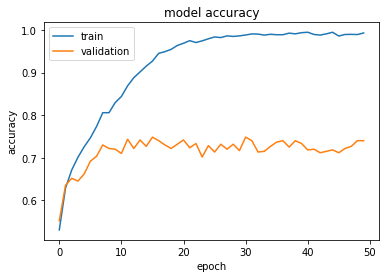

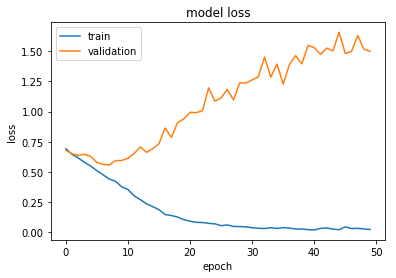

              precision    recall  f1-score   support

           0       0.76      0.80      0.78       324
           1       0.75      0.71      0.73       276

   micro avg       0.76      0.76      0.76       600
   macro avg       0.76      0.75      0.75       600
weighted avg       0.76      0.76      0.76       600

[[258  66]
 [ 80 196]]


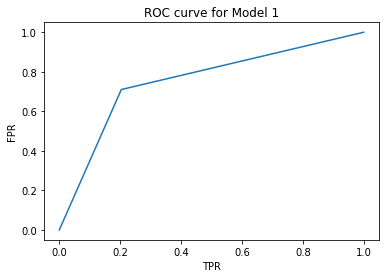

In [21]:
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, roc_curve
# Add your code here

# plot accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


# plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
#get predicted test
test_pred = model.predict(data_test)
# change float to int 
for i in range(len(test_pred)):
    test_pred[i]=int(1) if test_pred[i] >0.5 else int(0) 

#get the report
print(classification_report(label_test, test_pred))
#get confusion matrix
print(confusion_matrix(label_test, test_pred))



#calculate fpr tpr, labels which are equal to or more than 1 are considered as positive
fpr_1,tpr_1,thresholds_1 = roc_curve(label_test,test_pred,pos_label=1)
#set x,y label and title
plt.title("ROC curve for Model 1")
plt.xlabel("TPR")
plt.ylabel("FPR")
plt.plot(fpr_1,tpr_1)

Through the loss and accuracy curve, we can easily find that this model is overfiting. We should stop training around 10 epochs. The precision,recall,f1-score and confusion matrix show that this model has same ability in distinguishing cat and dog.

### Exercise 4

Explore different network architectures (e.g., stacking 4 Conv2D+MaxPooling2D layers) and various ways in tuning the model parameters to see if you can improve the model performance on the validation set.

In [7]:
# Add your code here

#define new model
model_new = Sequential()
#add BN layer before activation
model_new.add(Conv2D(32, (3,3), input_shape=(50, 50, 3)))
model_new.add(BatchNormalization())
model_new.add(Activation('relu'))

model_new.add(Conv2D(32, (3,3)))
model_new.add(BatchNormalization())
model_new.add(Activation('relu'))

#use dropout
model_new.add(MaxPooling2D(pool_size=(2, 2)))
model_new.add(Dropout(0.25))


model_new.add(Conv2D(64, (3, 3)))
model_new.add(BatchNormalization())
model_new.add(Activation('relu'))

model_new.add(Conv2D(64, (3, 3)))
model_new.add(BatchNormalization())
model_new.add(Activation('relu'))

model_new.add(MaxPooling2D(pool_size=(2, 2)))
model_new.add(Dropout(0.25))

model_new.add(Conv2D(128, (3, 3)))
model_new.add(BatchNormalization())
model_new.add(Activation('relu'))

model_new.add(Conv2D(128, (3, 3)))
model_new.add(BatchNormalization())
model_new.add(Activation('relu'))

model_new.add(Conv2D(64, (1, 1)))
model_new.add(BatchNormalization())
model_new.add(Activation('relu'))

model_new.add(MaxPooling2D(pool_size=(2, 2)))
model_new.add(Dropout(0.25))


model_new.add(Flatten())
model_new.add(Dense(256, activation='relu'))
model_new.add(Dropout(0.5))
model_new.add(Dense(1, activation='sigmoid'))
#output the model structure
model_new.summary()
#train model
model_new.compile(loss='binary_crossentropy',optimizer="adam",metrics=["accuracy"])
history_new=model_new.fit(data_train, label_train,validation_data=(data_validation,label_validation),batch_size=64, epochs=50)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 48, 48, 32)        896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 48, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 46, 46, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 46, 46, 32)        128       
_________________________________________________________________
activation_2 (Activation)    (None, 46, 46, 32)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 23, 23, 32)        0         
__________

From the model structure, we can find the input data size becomes smaller in deeper layers.  max_pooling2d_8 becomes 2*2. Through stacking convolution layer before maxpooling layers, we successfully get a better model. The reason of using dropout and BN layers is to avoid overfitting.  

### Exercise 5

Apply the trained model on the testing set and output the classification results.

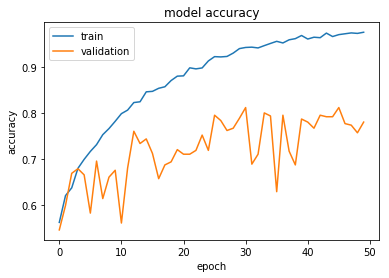

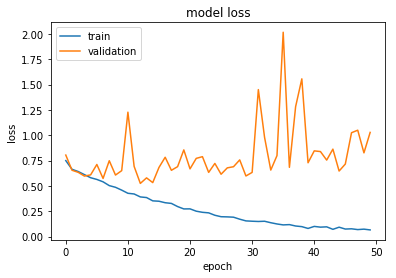

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       324
           1       0.82      0.76      0.79       276

   micro avg       0.81      0.81      0.81       600
   macro avg       0.81      0.81      0.81       600
weighted avg       0.81      0.81      0.81       600

[[277  47]
 [ 67 209]]


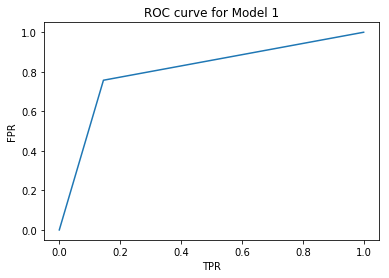

In [8]:
# Add your code here
#plot acc
plt.plot(history_new.history['acc'])
plt.plot(history_new.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


# plot loss
plt.plot(history_new.history['loss'])
plt.plot(history_new.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
#predict label
test_pred_new = model_new.predict(data_test)
for i in range(len(test_pred_new)):
    test_pred_new[i]=int(1) if test_pred_new[i] >0.5 else int(0) 

#print report
print(classification_report(label_test, test_pred_new))
#confusion matrix
print(confusion_matrix(label_test, test_pred_new))



#calculate fpr tpr, labels which are equal to or more than 1 are considered as positive
fpr_1_new,tpr_1_new,thresholds_1_new = roc_curve(label_test,test_pred_new,pos_label=1)
#set x,y label and title
plt.title("ROC curve for Model 1")
plt.xlabel("TPR")
plt.ylabel("FPR")
plt.plot(fpr_1_new,tpr_1_new)

Compared with the first model, we can find this model is better on avoiding overfitting.  BatchNormalization layer can reduce the dependence on parameter initialization, increases the generalization ability of model and speed up training process. In this model, the precision, recall, f1-score and confusion matrix are much better than model 1.

### Exercise 6 

Plot the saliency map of original image to see which part is important for making classification decisions. You can refer to the following blog article on how to generate visualisation results of the filters in the ConvNets.
https://blog.keras.io/how-convolutional-neural-networks-see-the-world.html

In [15]:
from keras import backend as K
# to see the conv name
layer_dict = dict([(layer.name, layer) for layer in model.layers])
print(layer_dict)

{'conv2d_3': <keras.layers.convolutional.Conv2D object at 0xb8092ac18>, 'max_pooling2d_3': <keras.layers.pooling.MaxPooling2D object at 0xb808f9390>, 'conv2d_4': <keras.layers.convolutional.Conv2D object at 0xb8092a128>, 'max_pooling2d_4': <keras.layers.pooling.MaxPooling2D object at 0xb80c98a58>, 'flatten_2': <keras.layers.core.Flatten object at 0xb808f95c0>, 'dense_3': <keras.layers.core.Dense object at 0xb80c98b38>, 'dropout_2': <keras.layers.core.Dropout object at 0xb80c8d710>, 'dense_4': <keras.layers.core.Dense object at 0xb410acc18>}


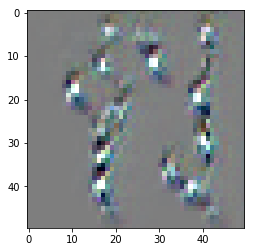

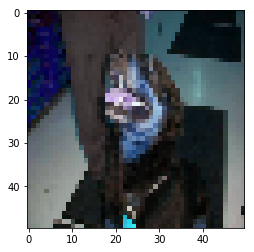

In [18]:
# Add your code here
from keras import backend as K
#get the dict has layer name
layer_dict = dict([(layer.name, layer) for layer in model.layers])
#set the layer we want to plot
layer_name = 'conv2d_4'
filter_index = 0  # can be any integer from 0 to 63, as there are 64 filters in that layer
layer_output = layer_dict[layer_name].output

def generate_filter_image(layer_output,img,layer_name,epochs):
    # build a loss function that maximizes the activation
    # of the nth filter of the layer considered
    loss = K.mean(layer_output[:, :, :, filter_index])
    # compute the gradient of the input picture wrt this loss
    grads = K.gradients(loss, model.input)[0]
    # normalization trick: we normalize the gradient
    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)
    # this function returns the loss and grads given the input picture
    iterate = K.function([model.input], [loss, grads])
    
    # run gradient ascent for epochs numbers 
    for i in range(epochs):
        loss_value, grads_value = iterate([img])
        img += grads_value * 1
    return img


def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1
    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)
    # convert to RGB array
    x *= 255
#     x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x
#use the third picture in train set and reshape it for fuction
img = data_train[2].reshape(1,50,50,3).astype('float32')
#generate_filter_image
img = generate_filter_image(layer_output,img,layer_name,50)
#utility function to convert a float array into a valid uint8 image
img = deprocess_image(img[0])
plt.imshow(img)
plt.show()
plt.imshow(data_train[2])
plt.show()

The upper picture shows the image which can be recognised by filter 0 in conv2d_4 layers. In this layer, the model has 64 filters. All these filters work together to distinguish cat and dog. The orignal picture is confusing. Because we reshape it into 50*50. People can not find it is a dog. But through CNN, computers can recongnize it.